### Experiment to see dependency of accuracy of a classification model on random_state

- Hypothesis : It should not have any direct correlation 

In [ ]:
import pandas as pd

In [3]:
df = pd.read_csv("logit classification.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
x = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score 
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {ac}")

Accuracy Score : 0.8875


In [37]:
df2 = pd.DataFrame(columns=["random_state","accuracy"])


In [40]:
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state = i)
    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    df2.loc[i] = [i,ac]
    

In [41]:
df2

,random_state,accuracy
0,0.0,0.8875
1,1.0,0.8125
2,2.0,0.8125
3,3.0,0.8250
4,4.0,0.8500
...,...,...
95,95.0,0.8625
96,96.0,0.7750
97,97.0,0.8625
98,98.0,0.8375


<Axes: xlabel='random_state', ylabel='accuracy'>

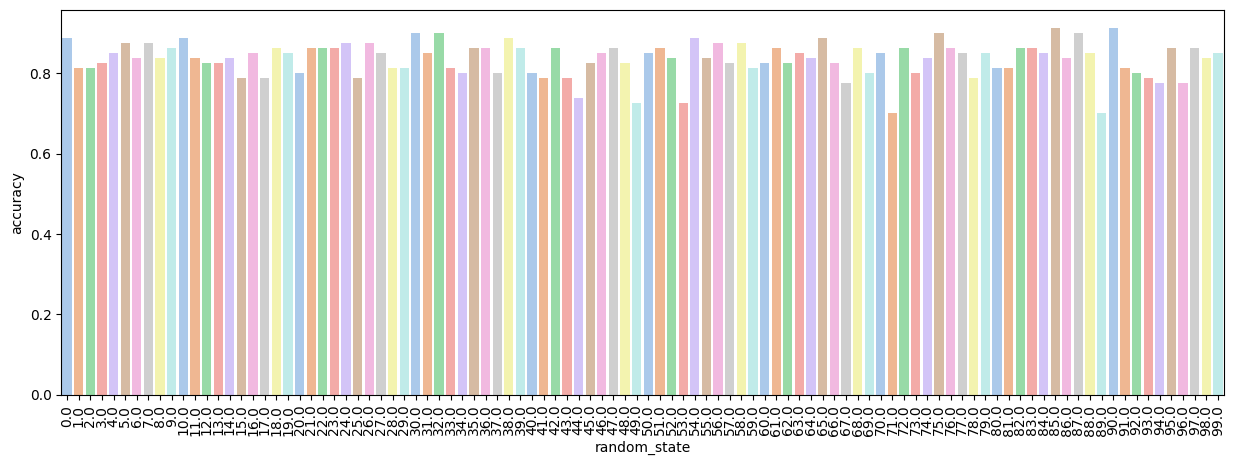

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
plt.xticks(rotation = "vertical")
sns.barplot(data = df2, x="random_state", y = "accuracy", hue  = "random_state", palette="pastel", legend=False)


In [52]:
df2

,random_state,accuracy
0,0.0,0.8875
1,1.0,0.8125
2,2.0,0.8125
3,3.0,0.8250
4,4.0,0.8500
...,...,...
95,95.0,0.8625
96,96.0,0.7750
97,97.0,0.8625
98,98.0,0.8375
